In [130]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fft as fft

Usando um esquema 64-ário, transmita a palavra “Raio”:

In [6]:
word = 'Raio'

Primeiro, codifique a palavra usando a codificação ASCII de 8 bits, mais um bit de
paridade. Quantos bits existem na mensagem?

In [24]:
def gen_parity(bits):
    parity_sum = 0
    for bit in bits:
        parity_sum += int(bit)
    parity_bit = parity_sum % 2
    
    return bits + str(parity_bit)

In [25]:
bit_list = []
for symbol in word:
    symbol_value = ord(symbol)
    bit_repr = bin(symbol_value)
    bit_list.append(bit_repr.replace('b', ''))

In [30]:
parity_bit_list = list(map(gen_parity, bit_list))

In [31]:
bit_list

['01010010', '01100001', '01101001', '01101111']

In [32]:
parity_bit_list

['010100101', '011000011', '011010010', '011011110']

Particione a sequência em segmentos com k = 4 bits. Represente cada partição como
um número hexadecimal. Quantos números são necessários para representar a
mensagem?

In [40]:
def generate_sequence(bit_list):
    sequence = ''
    for bits in bit_list:
        sequence = sequence + bits
    return sequence

In [75]:
def partitionate_sequence(sequence, k=4):
    if len(sequence) % k != 0:
        raise(Exception(f"{k} doesn't evenly break the sequence"))
    num_splits = len(sequence) / k
    segment_list = []
    count = 0 
    begin_window, end_window = 0, k
    while count < num_splits:
        segment = sequence[begin_window:end_window]
        segment_hex = hex(int(segment))
        segment_list.append(segment_hex.replace('x', ''))
        begin_window, end_window = end_window, end_window + k
        count += 1
    return segment_list

In [49]:
sequence = generate_sequence(parity_bit_list)

In [57]:
sequence

'010100101011000011011010010011011110'

In [76]:
segment_list = partitionate_sequence(sequence)

In [77]:
segment_list

['065', '0a', '03f3', '00', '044d', '03f2', '064', '044d', '0456']

Suponha que um texto com 800 caracteres deva ser transmitido em um período de 2
segundos. Cada caractere é representado por código ASCII de 7 bits, mais um bit de
paridade. Determine:

Qual a taxa de bits por segundo para que os caracteres sejam transmitidos em tempo
real (ou seja, dentro dos quatro segundos)? Qual a largura de banda correspondente,
assumindo que pulsos retangulares são utilizados em uma transmissão binária. Dica:
para pulsos retangulares, a largura de banda é assumida ser numericamente igual à taxa
de símbolos.

In [85]:
NUM_CHARACTERS = 800
CHARACTER_LENGTH = 7 + 1
NUM_BITS = NUM_CHARACTERS * CHARACTER_LENGTH
bit_rate = NUM_BITS / 4
symbol_rate = 

In [86]:
bit_rate

1600.0

In [ ]:
symbol_rate = 

Use o método da convolução para mostrar que o efeito de sub-amostrar a forma de onda
$x(t) = \cos(2\pi f_{0}t)$ usando uma frequência de amostragem de $fs = \dfrac{3}{2} f_{0}$.

In [139]:
t = np.linspace(0, 1, num=100)
base_frequency = 4 / 3
sample_frequency = 1.5 * base_frequency
x = np.cos(2 * np.pi * base_frequency * t)
X = fft.fft(x)

Text(0.5, 1.0, 'Signal in Frequency Domain')

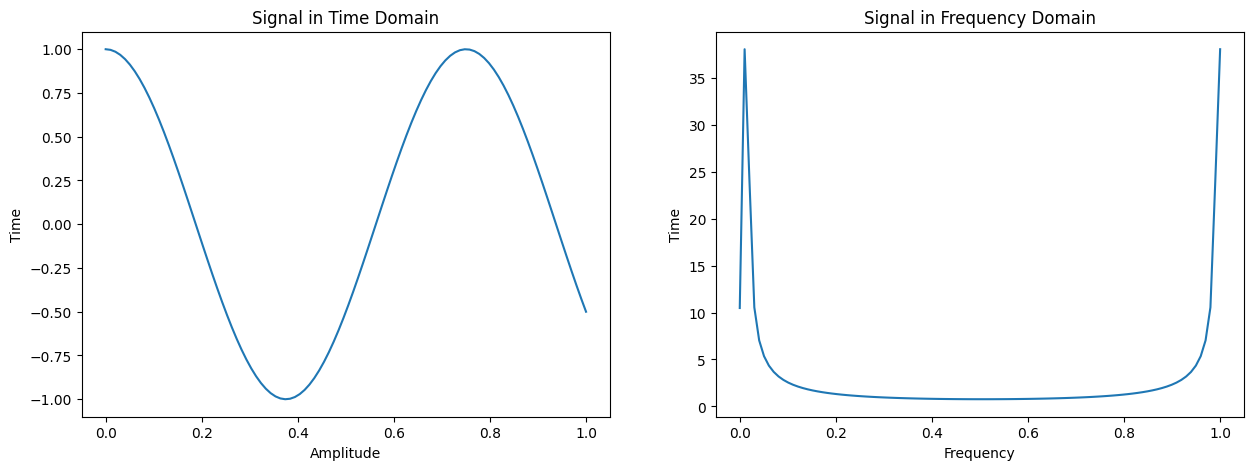

In [153]:
fig, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].plot(t, x)
ax[0].set_xlabel('Amplitude')
ax[0].set_ylabel('Time')
ax[0].set_title('Signal in Time Domain')

ax[1].plot(t, abs(X))
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Time')
ax[1].set_title('Signal in Frequency Domain')

In [122]:
samples = 100
sample_period = round(1 / sample_frequency, 2)
impulse_locations = []
for sample in range(samples):
    impulse_locations.append(sample)
#impulse_train = scipy.signal.unit_impulse(samples, [])
idx = 0

In [123]:
sample_period

0.5